#### Importing Libraries

In [28]:
# Libraries for general computations...
import numpy as np
import pandas as pd

# Libraries for Image Processing...
import cv2        
import PIL.Image as Image

# Libraries for Accessing Directories...
import os

# Libraries for Data Visualization...
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library for Machine Learning and Deep Learning...
import tensorflow as tf
import tensorflow_hub as hub

# Keras Wrapper Library for Neural Networks...
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
from tensorflow.python.keras.models import sequential
from tensorflow.python.keras.layers import Dense

    IMAGE_SHAPE+(3,) creates the Image of shape (224, 224) with 3 color channels of rgb which makes the array as (224, 224, 3)

In [2]:
IMAGE_SHAPE = (224, 224)
Classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5", input_shape=IMAGE_SHAPE+(3,))     # The link is taken from tensorflow hub...
])

(320, 232)


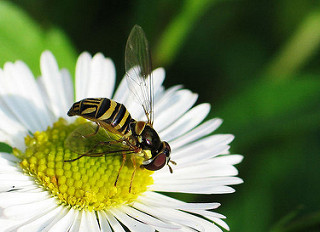

In [3]:
print(Image.open("E:/3d objects/Deep/Practice/datasets/flower_photos/daisy/5547758_eea9edfd54_n.jpg").size)
# Since the shape of the Image is (320, 232) and not (224, 224) so we may need to resize the Images...
Image.open("E:/3d objects/Deep/Practice/datasets/flower_photos/daisy/5547758_eea9edfd54_n.jpg")

(224, 224)


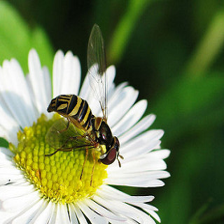

In [4]:
daisy = Image.open("E:/3d objects/Deep/Practice/datasets/flower_photos/daisy/5547758_eea9edfd54_n.jpg").resize(IMAGE_SHAPE)
# Now the Image is resized to (224, 224) and thus we can use the pre-trained model on these Images as well...
print(daisy.size)
daisy

#### Feature Extraction and Normalizing the Image

In [5]:
daisy = np.array(daisy)/255.0     # Normalizing the Image...

In [6]:
daisy[np.newaxis, ...].shape       # Adding one more dimension, such that the classifier does not take one Image and it takes set of Images so, we create another dimension for the index...

(1, 224, 224, 3)

    It gives the probability distribution of each class with respect to the given Image.

In [7]:
result = Classifier.predict(daisy[np.newaxis, ...])
result.shape     # Since it has 1000 classes...

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [8]:
predictedIndex = np.argmax(result)
predictedIndex

986

In [9]:
ImageLabels = []
with open("E:/3d objects/Deep/Practice/ImageNetLabels.txt", "r") as file:
    ImageLabels = file.read().splitlines()    # Returns the list of lines as a list breaking at list boundaries...

#### It classified it correctly as daisy flower.

In [10]:
ImageLabels[predictedIndex]

'daisy'

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [12]:
import pathlib     # Converting String path into windows path directory...
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [13]:
ImgCount = len(list(data_dir.glob('*/*.jpg')))    # To get the list of all the files with .jpg extension in / folder (here subfolder)...
print(ImgCount)

3670


In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

(240, 320, 3)


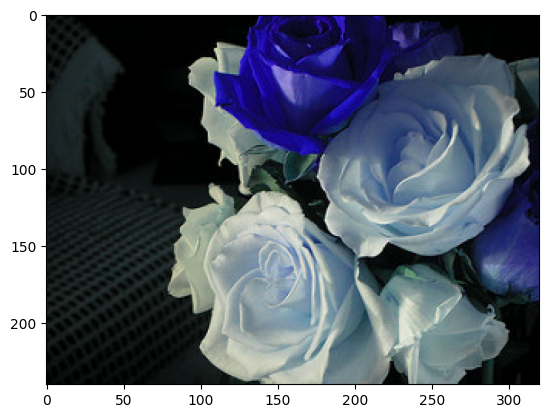

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][1]))
print(img.shape)    # Since the shape is 240 x 320 we have to convert it into 224 x 224...
plt.imshow(img)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(IMAGE_SHAPE))    # Resizing every Image to 224 x 224...
        X.append(resized_img)     # Adding the Image...
        y.append(flowers_labels_dict[flower_name])     # Adding the labels...

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
# Module for the training, testing and splitting...
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    Normalizing the Xtrain and Xtest datasets.

In [21]:
XtrainScaled = Xtrain / 255
XtestScaled = Xtest / 255

#### Providing a few Samples as the rose flowers and then try predicting it.

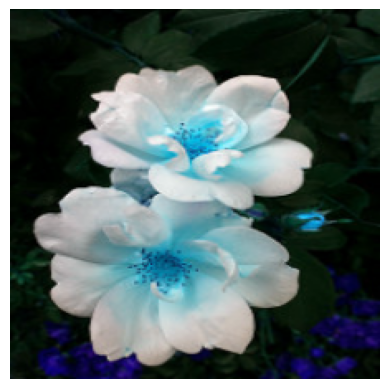

In [22]:
plt.axis('off')
plt.imshow(X[0])    # This flower is a Rose...

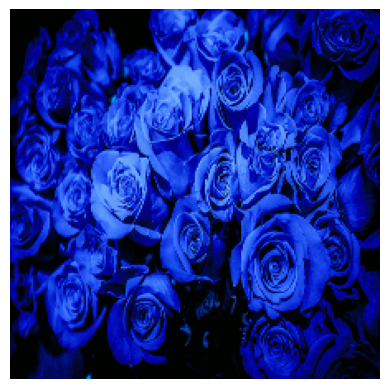

In [23]:
plt.axis("off")
plt.imshow(X[2])    # These flowers is also Roses...

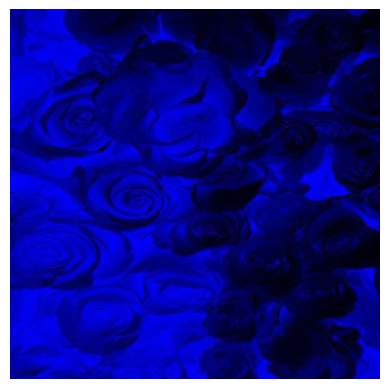

In [24]:
plt.axis("off")
plt.imshow(X[4])     # These flowers are also Roses...

In [25]:
Predict = Classifier.predict(np.array([X[0], X[2], X[4]]))    # Since we are giving three values we pass them as lists...
predicted = np.argmax(Predict, axis=1)
predicted

1/1 [==============================] - 3s 3s/step


array([612, 612, 612], dtype=int64)

    It predicted incorrectly the Roses as some other thing, because our current model does not have a rose classifier, it has only daisy as a class.

In [26]:
ImageLabels[612]

'jigsaw puzzle'

    Except for classification we have feature_vector which gives us the same model except the last layer, like we now have no classes pre-defined and we can define our own classes.

In [27]:
FeatureExtractor = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/5"
ModelWithoutSoftmax = hub.KerasLayer(FeatureExtractor, input_shape=(224, 224, 3), trainable=False)  # trainable false means we are freezing this model and this will not br trained further and the pre-defined weights will be used...

In [31]:
UniqueFlowers = 5
ConvolutionalNeuralNetwork = tf.keras.Sequential([
    ModelWithoutSoftmax,
    tf.keras.layers.Dense(UniqueFlowers)
])
ConvolutionalNeuralNetwork.summary()  # Method to get the details of the Neural Network layers...  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1664)              3766048   
                                                                 
 dense_2 (Dense)             (None, 5)                 8325      
                                                                 
Total params: 3,774,373
Trainable params: 8,325
Non-trainable params: 3,766,048
_________________________________________________________________


Metrics help in evaluation and categorization of the performance of the training mode with respect to cost function.

In [33]:
ConvolutionalNeuralNetwork.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
ConvolutionalNeuralNetwork.fit(XtrainScaled, Ytrain, epochs=5)

Epoch 1/5
86/86 [==============================] - 89s 999ms/step - loss: 0.6958 - accuracy: 0.7584
Epoch 2/5
86/86 [==============================] - 67s 781ms/step - loss: 0.3351 - accuracy: 0.8932
Epoch 3/5
86/86 [==============================] - 65s 755ms/step - loss: 0.2510 - accuracy: 0.9270
Epoch 4/5
86/86 [==============================] - 71s 827ms/step - loss: 0.2050 - accuracy: 0.9462
Epoch 5/5
86/86 [==============================] - 77s 898ms/step - loss: 0.1673 - accuracy: 0.9586


    Earlier classification of flowers into 5 categories took around 30 epochs to get an accuracy of 85% when we were ourselves training the model, but now when we train an already predefined model (it gave an accuracy of above 85% in second epoch itself) which has been trained on a very large dataset (millions of data), our accuracy sharp-shoots. This it the advantage of using pre-defined models and then training only the last few layers.

In [34]:
ConvolutionalNeuralNetwork.evaluate(XtestScaled, Ytest)

29/29 [==============================] - 28s 827ms/step - loss: 0.3139 - accuracy: 0.8824


[0.31393012404441833, 0.8823529481887817]

In [36]:
Ypred = ConvolutionalNeuralNetwork.predict(XtestScaled)

29/29 [==============================] - 30s 989ms/step


In [40]:
Yclasses = [np.argmax(element) for element in Ypred]    # They are the integer values on the classes mapped by Ypred dataset...

In [41]:
from sklearn.metrics import classification_report
print("Classification Report \n",classification_report(Ytest, Yclasses))

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       160
           1       0.92      0.82      0.87       158
           2       0.89      0.95      0.92       225
           3       0.93      0.87      0.90       175
           4       0.84      0.87      0.85       200

    accuracy                           0.88       918
   macro avg       0.89      0.88      0.88       918
weighted avg       0.88      0.88      0.88       918

